### Modules

In [138]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

epsilon = 1e-6

def normalize_logspec_A(coordinate):
    """
    Utility function for rotating a LogSpec tuple (targeting A)
    into its normal form.

    Expects a sorted input in the range [0, 1].
    """
    total = sum(coordinate)
    if total > epsilon:
        return normalize_logspec_A([*coordinate[1:], coordinate[0] - 1])
    elif total < -epsilon:
        raise ValueError(
            f"Over-rotated: {total}. I don't think this should happen."
        )
    else:
        return coordinate


def normalize_logspec_AC2(coordinate):
    """
    Utility function for rotating a LogSpec tuple (targeting A_{C_2})
    into its normal form.

    Expects a sorted input in the range [0, 1].
    """
    partially_normalized_coordinate = normalize_logspec_A(coordinate)
    if partially_normalized_coordinate[1] >= \
            -partially_normalized_coordinate[2]:
        return partially_normalized_coordinate
    else:
        return [partially_normalized_coordinate[2] + 1 / 2,
                partially_normalized_coordinate[3] + 1 / 2,
                partially_normalized_coordinate[0] - 1 / 2,
                partially_normalized_coordinate[1] - 1 / 2]

def unitary_to_monodromy_coordinate(unitary):
    """
    Given a unitary matrix, produces its alcove coordinate.
    """
    unitary = unitary * np.complex128(np.linalg.det(unitary)) ** (-1 / 4)
    sysy = np.array([
        [0,  0,  0, 1],
        [0,  0, -1, 0],
        [0, -1,  0, 0],
        [1,  0,  0, 0],
    ], dtype=complex)
    gammaQ = reduce(np.dot, [unitary, sysy, unitary.T, sysy])
    logspec_coordinate = np.real(
        np.log(np.linalg.eigvals(gammaQ)) / (2 * np.pi * 1j))
    return normalize_logspec_AC2(
        sorted(np.mod(logspec_coordinate, 1.0), reverse=True)
    )

def monodromy_to_positive_canonical_coordinate(x, y, z):
    """
    Given a monodromy alcove coordinate, produces its image as an unnormalized positive canonical coordinate. Take the first three of the four monodromy coordinates.
    """
    normalizing_factor = np.pi
    return (
        (x + y) / 2 * normalizing_factor,
        (z + x) / 2 * normalizing_factor,
        (y + z) / 2 * normalizing_factor
    )

### Gates

In [324]:
XX = lambda theta: np.array([[np.cos(theta), 0, 0, -1j*np.sin(theta)], 
                             [0, np.cos(theta), -1j*np.sin(theta), 0], 
                             [0, -1j*np.sin(theta), np.cos(theta), 0], 
                             [-1j*np.sin(theta), 0, 0, np.cos(theta)]])

YY = lambda theta: np.array([[np.cos(theta), 0, 0, 1j*np.sin(theta)], 
                             [0, np.cos(theta), -1j*np.sin(theta), 0], 
                             [0, -1j*np.sin(theta), np.cos(theta), 0], 
                             [1j*np.sin(theta), 0, 0, np.cos(theta)]])

XY = lambda theta: XX(theta)@YY(theta)

### XX

We have that

$$XX(\alpha) = \exp(-i\alpha XX)$$

By page 5 of $XX$, we have that $0\leq \alpha \leq \frac{\pi}{4}$. By computation, we have that

$$\Pi(XX(\alpha)) = \left(\frac{\alpha}{\pi}, \frac{\alpha}{\pi}, - \frac{\alpha}{\pi}, - \frac{\alpha}{\pi}\right)$$

Let $x_1, ..., x_4$ be the monodromy coordinates, we have that the monodromy coordinates for XX satisfies

$$0 \leq x_1 \leq \frac{1}{4}, \quad x_2 = x_1, \quad x_3 = -x_1.$$

### XY

We have that

$$XY(\alpha) = \exp[-i\alpha (XX+YY)]$$

By page 5 of $XX$, we have that $0\leq \alpha+\alpha \leq \frac{\pi}{4}$. By computation, we have that

$$\Pi(XY(\alpha)) = \left(\frac{2\alpha}{\pi}, 0, 0, - \frac{2\alpha}{\pi}\right)$$

Let $x_1, ..., x_4$ be the monodromy coordinates, we have that the monodromy coordinates for XY satisfies

$$0 \leq x_1 \leq \frac{1}{2}, \quad x_2 = 0, \quad x_3 = 0.$$


### Angles

In [513]:
unitary_to_monodromy_coordinate(XY(np.pi/4))

[0.49999999999999994, 0.0, 0.0, -0.5]

In [307]:
# Generate unitary
# Convert to monodromy
# Convert to positive canonical coordinate
# Plot

# Example usage
n = 4  # Size of the matrix
a, b = -4, 5
H = a*XX+b*YY

coord_list = []
for t in np.random.uniform(0, 1/4, 10000):
    U = expm(1j*H*np.pi*t)
    x, y, z = unitary_to_monodromy_coordinate(U)[:3]
    coord_list.append(np.round(monodromy_to_positive_canonical_coordinate(x/np.pi, y/np.pi, z/np.pi), 10))

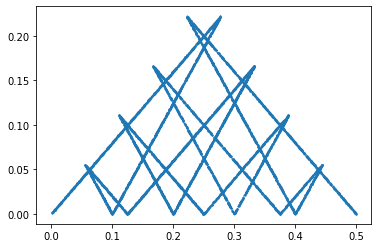

In [311]:
plt.scatter(x_coord, y_coord, s = 1)